# Création du brief Nuage Compta

## 1- Gestion des imports

In [20]:
%load_ext autoreload
%autoreload

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import ModelCheckpoint, Callback

import methods
# from methods import Methods
# from methods.Methods import get_result
# from methods.methods import negatif
# import tensorflow

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Paraètres de l'application

In [21]:
# Filename of the model weights output
modele_best = "cnn_best.hdf5"
modele_final = "cnn_final.hdf5"

DATA_ROOT = '/data/'
MODELES_PATH = 'modeles/'
TRAINING_PATH = 'training/'
TESTING_PATH = 'testing/'
ABC_PATH = '/data/alphbet-dataset/'

batch_size = 5975
num_classes = 26
epochs = 15

# input image dimensions
# img_rows, img_cols = 28, 28
img_size = 28
input_shape = (img_size, img_size, 3)

In [22]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    directory = "data/training",
    target_size = (img_size,img_size),
    # batch_size = 200,
    class_mode = "categorical"

)

test_generator = test_datagen.flow_from_directory(
    directory = "data/testing",
    target_size = (img_size,img_size),
    # batch_size = 100,
    class_mode = "categorical"

)

Found 5200 images belonging to 26 classes.
Found 775 images belonging to 26 classes.


In [23]:
model = Sequential()

model.add(Conv2D(img_size, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape
                 ))

model.add(Conv2D(img_size, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()

checkpointer = ModelCheckpoint(filepath= DATA_ROOT + MODELES_PATH + modele_best, verbose=1, save_best_only=False)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 28)        784       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 28)        7084      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 28)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4032)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               516224    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [24]:
model.fit(train_generator,
        #   batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(test_generator), 
          callbacks=[checkpointer]
          )

score = model.evaluate(train_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Saving model...")
model.save_weights(DATA_ROOT + MODELES_PATH + modele_final)
print("All done !")

Epoch 1/15
163/163 [==============================] - 17s 107ms/step - loss: 2.2652 - accuracy: 0.3387 - val_loss: 1.5966 - val_accuracy: 0.6439

Epoch 00001: saving model to /datacnn_best.hdf5
Epoch 2/15
163/163 [==============================] - 15s 91ms/step - loss: 1.3566 - accuracy: 0.5798 - val_loss: 1.6462 - val_accuracy: 0.7845

Epoch 00002: saving model to /datacnn_best.hdf5
Epoch 3/15
163/163 [==============================] - 17s 106ms/step - loss: 1.0775 - accuracy: 0.6606 - val_loss: 0.0365 - val_accuracy: 0.8477

Epoch 00003: saving model to /datacnn_best.hdf5
Epoch 4/15
163/163 [==============================] - 17s 106ms/step - loss: 0.9116 - accuracy: 0.7098 - val_loss: 0.2670 - val_accuracy: 0.8581

Epoch 00004: saving model to /datacnn_best.hdf5
Epoch 5/15
163/163 [==============================] - 16s 97ms/step - loss: 0.7884 - accuracy: 0.7477 - val_loss: 0.0212 - val_accuracy: 0.8671

Epoch 00005: saving model to /datacnn_best.hdf5
Epoch 6/15
163/163 [============

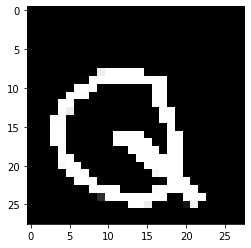

In [25]:
image_loaded = r'data/image-test.png'
test_image = image.load_img(image_loaded, target_size = (img_size,img_size))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)


In [26]:
resultat = model.predict_proba(test_image)
lettre = Methods.get_result(resultat)
# score_test = model.evaluate(resultat, verbose=0)

print (resultat)
# print(np.argmax(resultat, axis=1))
print(lettre)

# test_result = model.predict_proba(self, test_image)

# make a prediction
# ynew = model.predict(Xnew)
# # show the inputs and predicted outputs
# for i in range(len(test_image)):
# 	print("X=%s, Predicted=%s" % (test_image[i], resultat[i]))

# print(f"La lettre correspondante est: {resultat}")

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
G


In [ ]:
Methods.negatif("data/imagedentrainement.jpeg", "data/imagedentrainement_sortie.jpeg")

#Create MSER object
mser = cv2.MSER_create()

#Your image path i-e receipt path
img = cv2.imread('data/imagedentrainement_sortie.jpeg')

#Convert to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

vis = img.copy()

#detect regions in gray scale image
# regions, _ = mser.detectRegions(gray)

# hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]

# cv2.polylines(vis, hulls, 1, (255, 255, 255))

# plt.imshow(vis)

# cv2.waitKey(0)

# mask = np.zeros((img.shape[0], img.shape[1], 1), dtype=np.uint8)

# for contour in hulls:

#        cv2.drawContours(mask, [contour], -1, (255, 255, 255), -1)

# #this is used to find only text regions, remaining are ignored
# img_filter = cv2.bitwise_and(img, img, mask=mask)

# plt.imshow(img_filter)

# cv2.waitKey(0)